In [3]:
#lets start with the fact that if you want a quick and dirty data analysis.... pandas profiling is your best friend. 
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts import project_functions as sc
from matplotlib import pyplot as plt
import seaborn as sns
path = "\\analysis\\Matthew"
#Dear TA. the pandas profiling is in the current folder. Please check it. 
df = sc.load_and_process(path)
prof = ProfileReport(df)
prof.to_file(output_file='profileReport.html')
#now we wait 10 years......
df

"""
IT would be intriuging to check fatal outcomes against gender... My guess however is our data wouldn't be that accurate, since there is 
a higher overall count of females vs males. Nauturally if more females where infected, then more would probably have had a fatal outcome. Still... maybe I'm wrong. I'll check it out later. 

"""


"\nIT would be intriuging to check fatal outcomes against gender... My guess however is our data wouldn't be that accurate, since there is \na higher overall count of females vs males. Nauturally if more females where infected, then more would probably have had a fatal outcome. Still... maybe I'm wrong. I'll check it out later. \n\n"

In [4]:
#Lets apply the code we learned from lab four get a column called days_since
s_df = sc.simplify(sc.load_and_process(path))
s_df['Dt_Format'] = pd.to_datetime(s_df.Reported_Date)
s_df['Dt_Format'] = s_df.Dt_Format.dt.date
s_df['Days_Since'] = (s_df['Dt_Format'][0:] - min(s_df['Dt_Format'])) 
s_df['Days_Since'] = s_df['Days_Since'].dt.days
s_df

,Age_Group,Source_of_Infection,Episode_Date,Reported_Date,Gender,Outcome,Ever_Hospitalized,Ever_in_ICU,Dt_Format,Days_Since
0,50-59,Travel,2020-01-21,2020-01-23,MALE,Yes,No,No,2020-01-23,0
1,50-59,Travel,2020-01-22,2020-01-23,FEMALE,No,No,No,2020-01-23,0
2,20-29,Travel,2020-02-05,2020-02-21,FEMALE,No,No,No,2020-02-21,29
3,50-59,N/A - Outbreak associated,2020-02-07,2020-04-13,MALE,No,No,No,2020-04-13,81
4,70-79,Travel,2020-02-14,2020-03-01,FEMALE,No,No,No,2020-03-01,38
...,...,...,...,...,...,...,...,...,...,...
13212,60-69,Close contact,2020-07-12,2020-06-28,FEMALE,No,No,No,2020-06-28,157
13213,<19,Close contact,2020-07-12,2020-07-12,FEMALE,No,No,No,2020-07-12,171
13214,30-39,Close contact,2020-07-12,2020-07-12,MALE,No,No,No,2020-07-12,171
13215,30-39,Travel,2020-07-12,2020-07-12,MALE,No,No,No,2020-07-12,171


In [5]:
prof = ProfileReport(s_df)
prof.to_file(output_file='SimplifiedProfileReport.html')

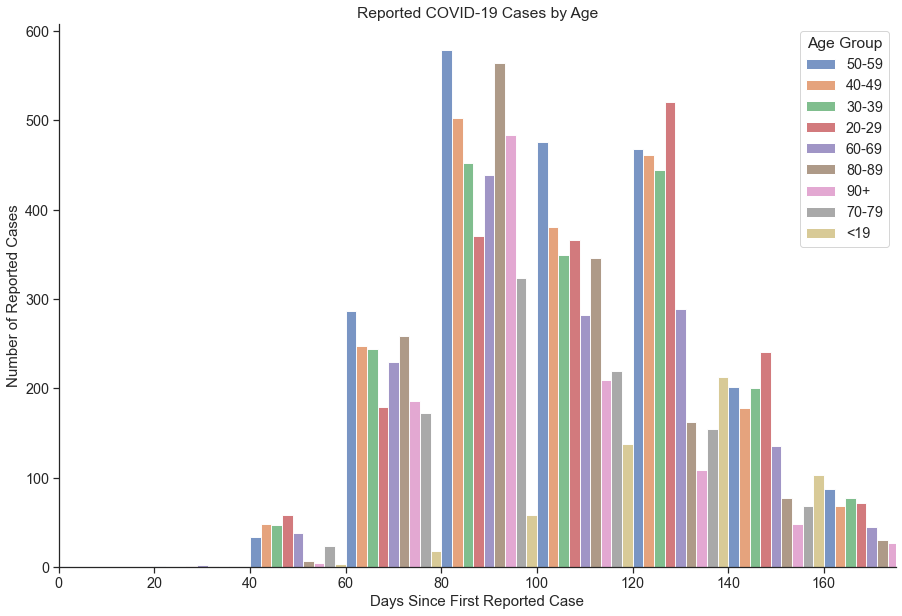

The earliest reported case of COVID-19 in Ontario was: 2020-01-23
The latest reported case of COVID-19 in Ontario was: 2020-07-13


" \nThis data seems to suggest that highest reported age group are gen X'ers. \nMaybe this is because gen x is less socially counsious than gen z, millenials, and the elderly?  \nOr maybe gen x is more established, and working less intense hours due to having built up some stable finances. Either way... this is intriguing .\n"

In [27]:

#lets produce a fancy histogram of our age_group. unlike the lab this will require a little more finesse
ls = s_df['Age Group'].value_counts().to_dict()
plt.figure(figsize=(15,10))

sns.set_theme(style="ticks", font_scale=1.3 ) # This scales the fonts slightly higher 
# And we're going to remove the top and right axis lines
plt.rc("axes.spines", top=False, right=False)

g = sns.histplot(data = s_df,   x = 'Days_Since', hue = 'Age Group', hue_order = ls, multiple = 'dodge'  , kde = False,  binwidth= 20)
plt.ylabel("Number of Reported Cases", size=15)
plt.title("Reported COVID-19 Cases by Age")
plt.xlabel("Days Since First Reported Case", size=15)
g.set(xlim=(0,175),)
plt.savefig("Age_Demographics.png")
plt.show()

print("The earliest reported case of COVID-19 in Ontario was: " + str(min(s_df['Dt_Format'])) )
print("The latest reported case of COVID-19 in Ontario was: "  + str(max(s_df['Dt_Format'])) )

""" 
This data seems to suggest that highest reported age group are gen X'ers. 
Maybe this is because gen x is less socially counsious than gen z, millenials, and the elderly?  
Or maybe gen x is more established, and working less intense hours due to having built up some stable finances. Either way... this is intriguing .
"""

'\nAs we can see from this dataset, 50-59 yr old women seem to be our largest offender for outbreaks. \n'

<Figure size 1440x360 with 0 Axes>

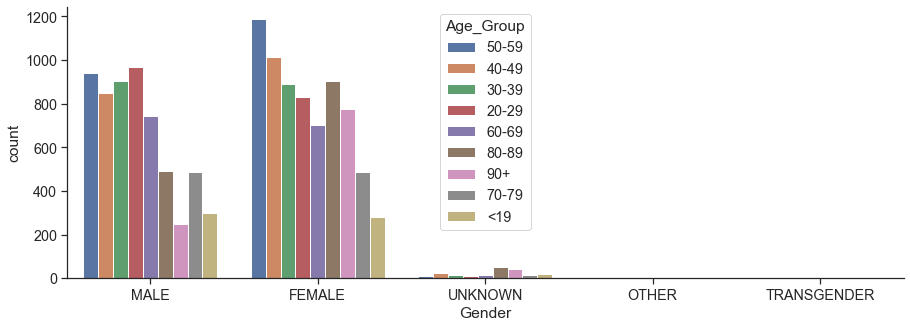

In [7]:
ls = s_df['Age_Group'].value_counts().to_dict()
plt.figure(figsize=(20,5))
plt.figure(figsize=(15,5))
sns.countplot(x= 'Gender', hue = "Age_Group", data=s_df, hue_order = ls )

"""
As we can see from this dataset, 50-59 yr old women seem to be our largest offender for outbreaks. 
"""

<AxesSubplot:xlabel='count', ylabel='Source_of_Infection'>

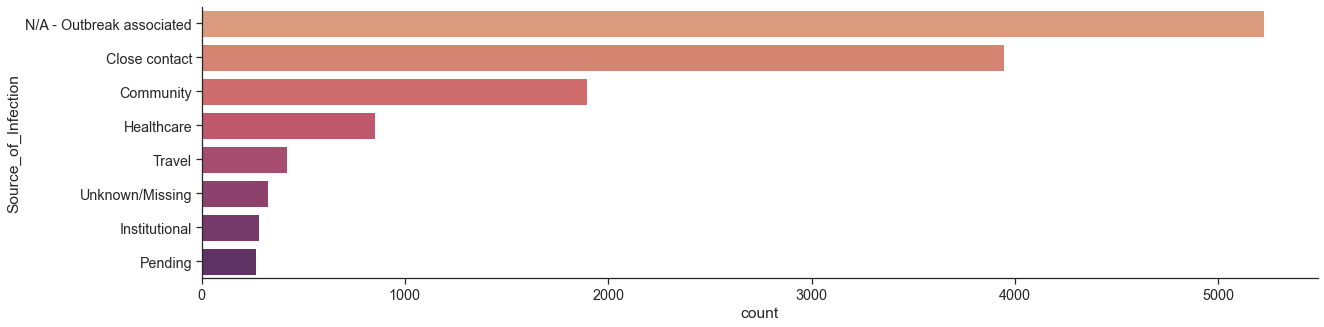

In [8]:
ls = s_df['Source_of_Infection'].value_counts().to_dict()
plt.figure(figsize=(20,5))
sns.countplot(y = "Source_of_Infection", data =s_df, order = ls, palette = 'flare')

# this is a quick and easy way to visualize outbreak. I'm seeing a lot of 90+ spikes, 
#so It would be fun to explor taking the outbreak and comparing it with the elderly to see if there is out breaks elederly homes

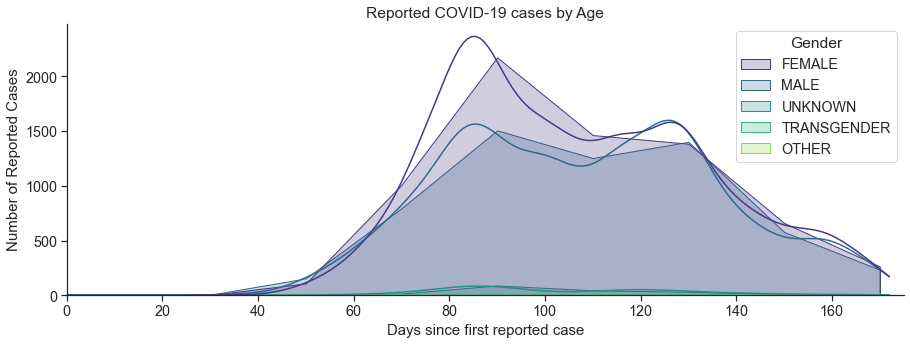

"\nI had this plot set to multiple = stack initially, but the data looked very deceptive. Friend dont' let friend use stack. \nThis lets us know if it's males, females, or otherwise for who was most infected and when. Notice it's mostly females. We can try to guess why later...\n\nmaybe women are more socialble than males? I know women are scientifically proven to have closer friendships... maybe this whole spike is just a result of hugging friends. \nLet's compare the contact and gender in our deep dive. \n"

In [9]:
ls = s_df['Gender'].value_counts().to_dict()

plt.figure(figsize=(15,5))

sns.set_theme(style="ticks", font_scale=1.3 ) # This scales the fonts slightly higher 
# And we're going to remove the top and right axis lines
plt.rc("axes.spines", top=False, right=False)

sns_plot = sns.histplot(data = s_df,   x = 'Days_Since', hue = 'Gender', hue_order = ls ,  element ='poly', palette = 'viridis', kde =True, binwidth= 20)
plt.ylabel("Number of Reported Cases", size=15)
plt.title("Reported COVID-19 cases by Age")
plt.xlabel("Days since first reported case", size=15)
sns_plot.set(xlim=(0,175),)
plt.savefig("Reported Covid-19 cases by Age")
plt.show()

"""
I had this plot set to multiple = stack initially, but the data looked very deceptive. Friend dont' let friend use stack. 
This lets us know if it's males, females, or otherwise for who was most infected and when. Notice it's mostly females. We can try to guess why later...

maybe women are more socialble than males? I know women are scientifically proven to have closer friendships... maybe this whole spike is just a result of hugging friends. 
Let's compare the contact and gender in our deep dive. 
"""